**1. 차원축소의 3가지 접근법**
 - 피처선택(Feature Selection) 
     > 불필요한 피처를 버린다.이때, 불필요한 것은 <span style = 'color:lime'>상관계수 값</span>을 통해 판단
 - 피처추출(Feature Extraction)
     > 피처를 선택하는 것이 아니라 <span style = 'color:lime'>더 작은 차원으로 피처를 매핑</span>하는 것.
     PCA, LDA, SVD, NMF 등
 - 피처생성(Feature Engineering)
     > 특성공학, 데이터 테이블에 피처가 부족한 상황일 때 적용하는 기법
     
**2. PCA**
 - 가장 대표적인 차원축소 알고리즘
 - 여러 피처간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소한다.
 - <span style = 'color:lime'>PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소한 것이 **PCA의 주성분**</span>이 된다.
 
**3. PCA 수행과정**
 - 입력 데이터 세트의 공분산 행렬을 생성한다.
 - 공분산 행렬의 고유벡터와 고유값을 계산한다.
 - 고유값이 가장 큰 순으로 <span style = 'color:lime'>k개(PCA의 변환 차수)만큼 고유벡터를 추출</span>한다.
 - 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.
 
 399~404p

## 필수 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rc('axes', unicode_minus=False)
mpl.rcParams['font.family'] = 'batang'

sns.set_style('dark') # 노트
sns.set(color_codes=True)
plt.rc('figure', figsize=(10,8))

warnings.filterwarnings('ignore')

## 데이터셋 로딩

In [3]:
from sklearn.datasets import load_iris

d, t = load_iris(True)

In [76]:
iris = load_iris()

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

컬럼명이 띄어쓰기 되어있고 단위를 없애야겠군

In [80]:
# 컬럼명 변경과 iris데이터프레임 생성
columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
df = pd.DataFrame(iris.data, columns = columns)
df['target'] = iris.target

df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 각 클래스별 데이터 분포의 시각화

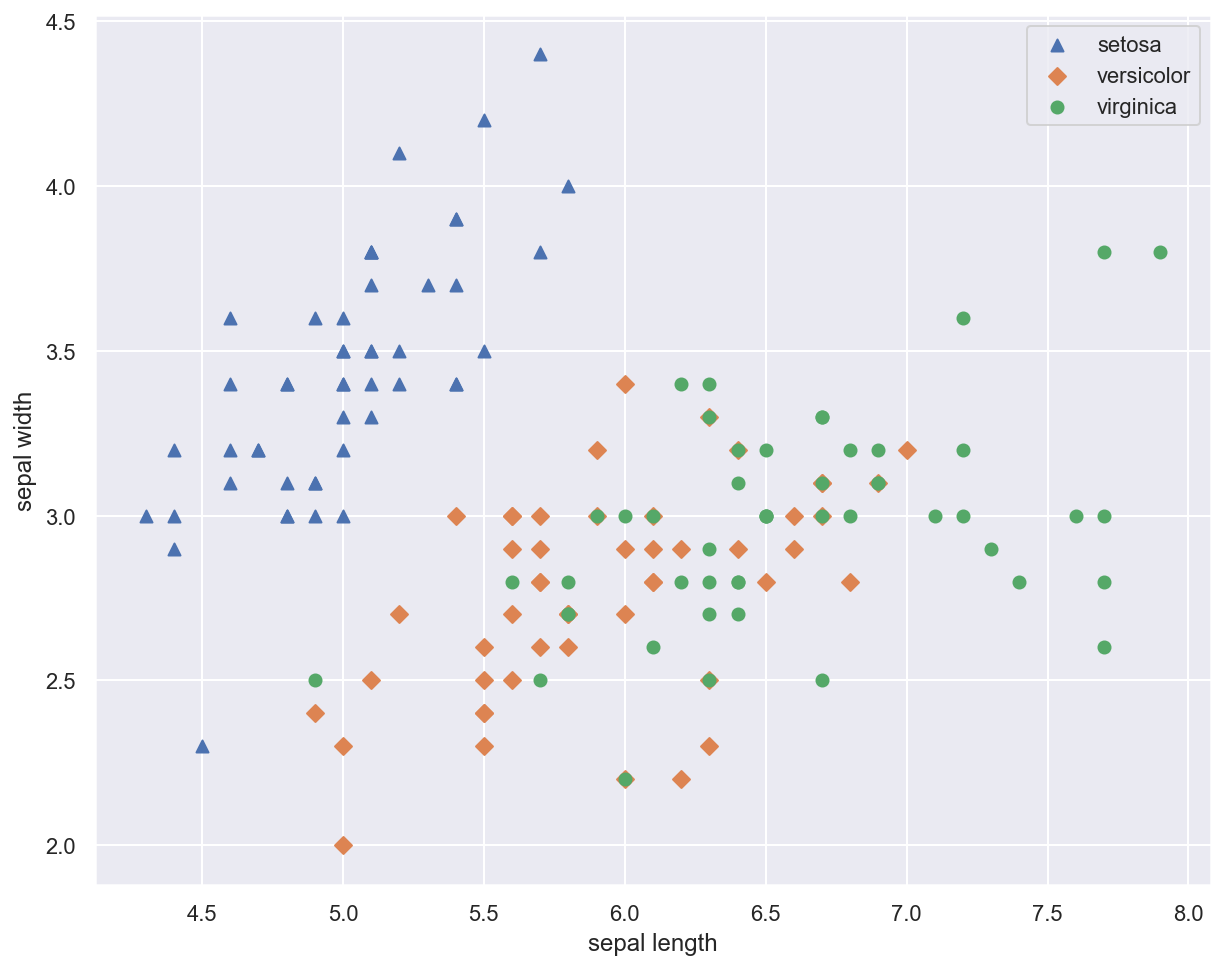

In [78]:
# 타깃별 마크 모양 설정
markers= ['^','D','o']

# 반복문을 이용하여 그래프 그리기(인덱스와 값을 같이 불러오는 함수)
## i가 index를 받을거임.(0:setosa, 1:versicolor, 3: virginica)
for i, marker in enumerate(markers):
    x_axis = df[df['target'] == i]['sepal_length']
    y_axis = df[df['target'] == i]['sepal_width']
    plt.scatter(x_axis, y_axis, marker=marker, label=iris.target_names[i])
    
plt.legend(loc='best')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

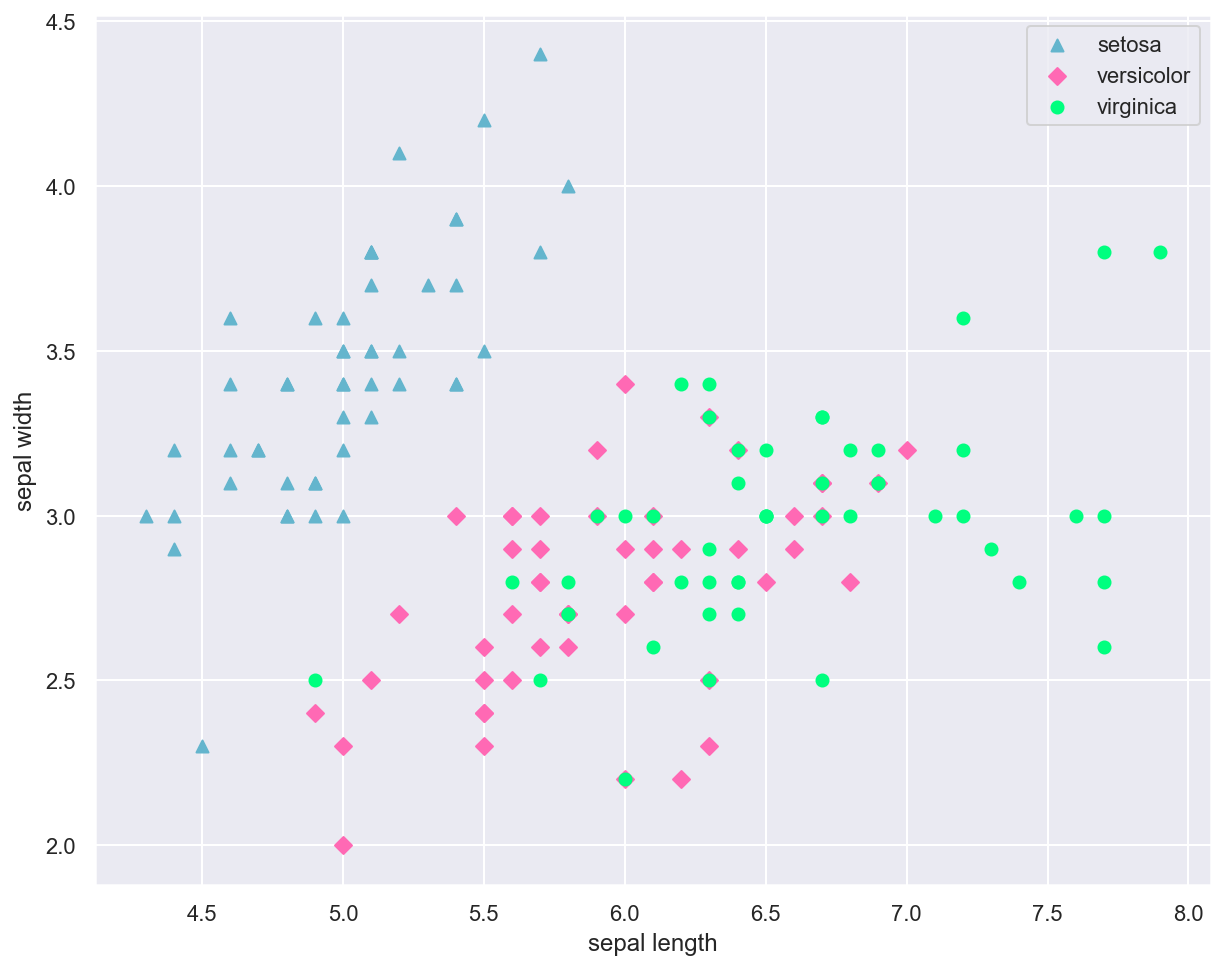

In [83]:
## 색옵션도 같이 돌려보려구
markers= ['^','D','o']

color=['c', 'hotpink','springgreen']
# 반복문을 이용하여 그래프 그리기(인덱스와 값을 같이 불러오는 함수)
## i가 index를 받을거임.(0:setosa, 1:versicolor, 3: virginica)
for i, marker in enumerate(markers):
    x_axis = df[df['target'] == i]['sepal_length']
    y_axis = df[df['target'] == i]['sepal_width']
    plt.scatter(x_axis, y_axis, marker=marker, label=iris.target_names[i],
               color=color[i])
    
plt.legend(loc='best')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### 전처리_피처 스케일링
- pca는 여러 피처값을 연산하기에 스케일의 영향을 많이 받음
- 적용전에 피처 스케일링 작업이 필요함.

In [18]:
from sklearn.preprocessing import StandardScaler

# 타겟값을 제외한 피처 추출(-1)
df_input = df.iloc[:, :-1]
iris_scaled = StandardScaler().fit_transform(df_input)
iris_scaled_df = pd.DataFrame(iris_scaled)
iris_scaled_df['target'] = df.target

In [19]:
# 스케일링 확인\
iris_scaled_df.describe()

,0,1,2,3,target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


In [21]:
df.iloc[:,:-1].describe() # 스케일 전 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
# 한 번에 위의 과정을 줄이는 법
example = StandardScaler().fit_transform(df.iloc[:,:-1]) 
## DataFrame로는 안 만듬

### 주성분 분석을 통해 차원축소

In [32]:
from sklearn.decomposition import PCA

# 변환할 차원 수 입력
pca = PCA(n_components = 2) # 2차원으로 축소

# 스케일 데이터 -> PCA변환 데이터
pca.fit(example) #fitting
iris_pca = pca.transform(example) # 변환

# 변환후 차원 추출
print(f'스케일 데이터의 차원수: {example.shape}', f'PCA변환 데이터의 차원수: {iris_pca.shape}')

스케일 데이터의 차원수: (150, 4) PCA변환 데이터의 차원수: (150, 2)


- 4차원이던 스케일링 데이터가 변화후 2차원으로 준것을 확인할 수 있음

In [33]:
# PCA데이터 프레임 생성
## 세팔과 페탈로 나뉘는게 아니라 안에서 최적의 축을 찾는거임.
## 그래서 관용적으로 component_1,2로 사용
pca_columns = ['pca1_sepal', 'pca2_petal']

iris_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_pca['target']= iris.target

iris_pca.head()

,pca1_sepal,pca2_petal,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


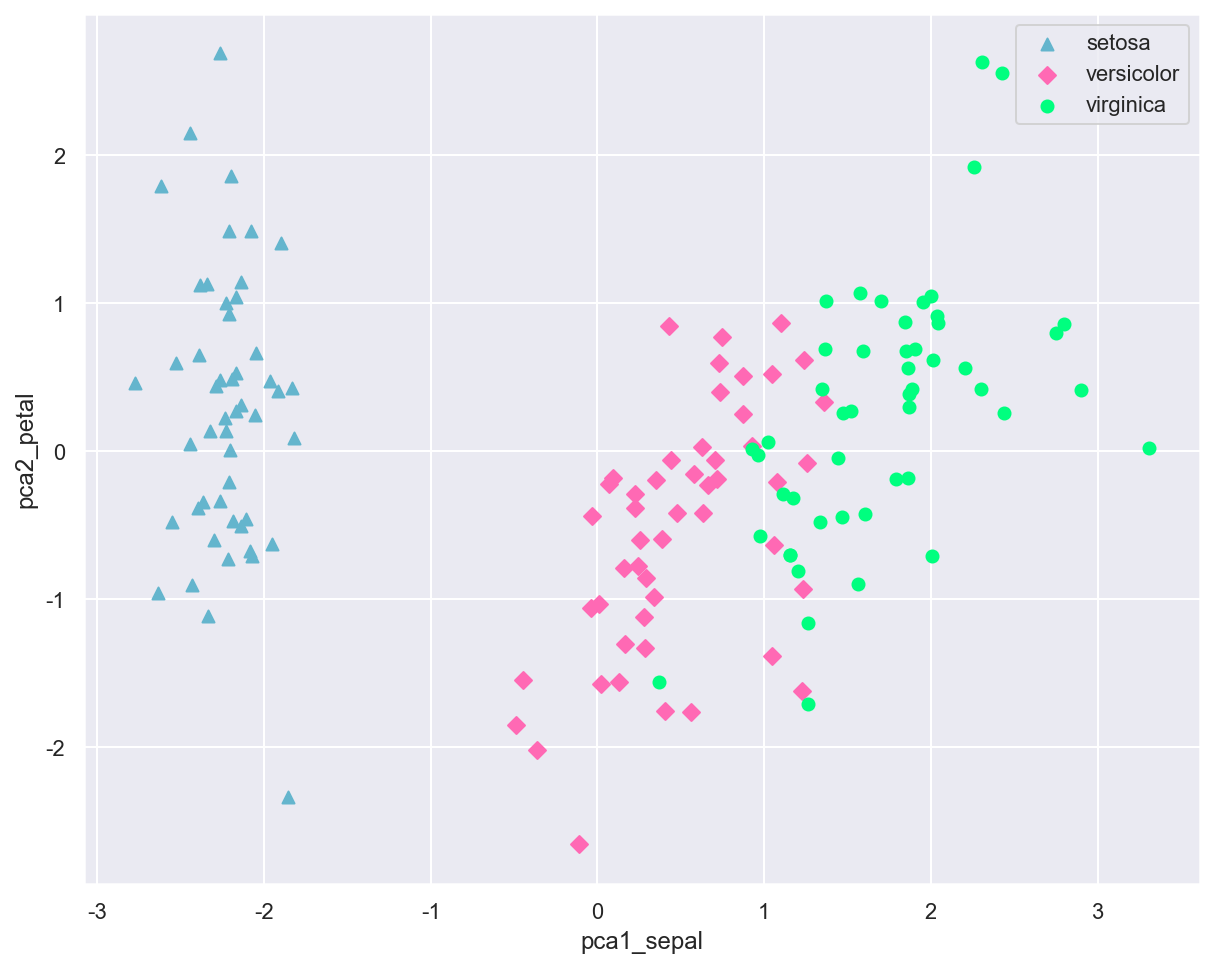

In [84]:
markers= ['^','D','o']
color=['c', 'hotpink','springgreen']
# 반복문을 이용하여 그래프 그리기(인덱스와 값을 같이 불러오는 함수)
## i가 index를 받을거임.(0:setosa, 1:versicolor, 3: virginica)
for i, marker in enumerate(markers):
    x_axis = iris_pca[iris_pca['target'] == i]['pca1_sepal']
    y_axis = iris_pca[iris_pca['target'] == i]['pca2_petal']
    plt.scatter(x_axis, y_axis, marker=marker, 
                label=iris.target_names[i], color=color[i])
    
plt.legend(loc='best')
plt.xlabel('pca1_sepal')
plt.ylabel('pca2_petal')
plt.show()

In [35]:
# component 변동성이 반영된 변동 비율
## 전체 변동성에서 개별 PCA 컴포넌트별 차지하는 변동성 비율
pca.explained_variance_ratio_

## 이 비율의 합이 pca 차원축소로 인해 분류할 수 있는 정도를 나타낼수 있음.

array([0.72962445, 0.22850762])

### PCA 변환 전/후 분류

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
## 변환 전
# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(random_state=2022)

# 교차검증
scores = cross_val_score(rcf, df.iloc[:,:-1], df.target, scoring = 'accuracy',
                        cv = 3) # 3개로 교차검증
# 정확도
print(f'원본 데이터 fold별 정확도: {scores}')
print(f'원본 데이터 평균 정확도: {np.mean(scores):.4f}')

원본 데이터 fold별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.9600


In [37]:
## 변환 후
# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(random_state=2022)

# 교차검증
pca_scores = cross_val_score(rcf, iris_pca.iloc[:,:-1], iris_pca.target,
                             scoring = 'accuracy',cv = 3) # 3개로 교차검증
# 정확도
print(f'원본 데이터 fold별 정확도: {pca_scores}')
print(f'원본 데이터 평균 정확도: {np.mean(pca_scores):.4f}')

원본 데이터 fold별 정확도: [0.88 0.88 0.9 ]
원본 데이터 평균 정확도: 0.8867


- 정확도는 8% 정도 줄어들었지만, 4차원에서 2차원으로 줄어듬(유실데이터)

## UCI 신용카드 고객 데이터

In [55]:
# 첫 행 제거, ID제거
df = pd.read_excel('C:/k_digital/Sourcce/data/default_card.xls',
                   header=1,sheet_name='Data').drop('ID', axis=1)

In [51]:
df.shape

(30000, 24)

In [52]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


- target : default ~, 다음달 연체 여부. 연체(1), 정상(0)
- pay_0 -> pay_1로 변경

In [61]:
# 컬럼명 변경
df.rename(columns = {'PAY_0':'PAY_1', 'default payment next month':'target'}, inplace=True )

In [62]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [63]:
X_features = df.drop('target', axis=1)
y_target = df['target']

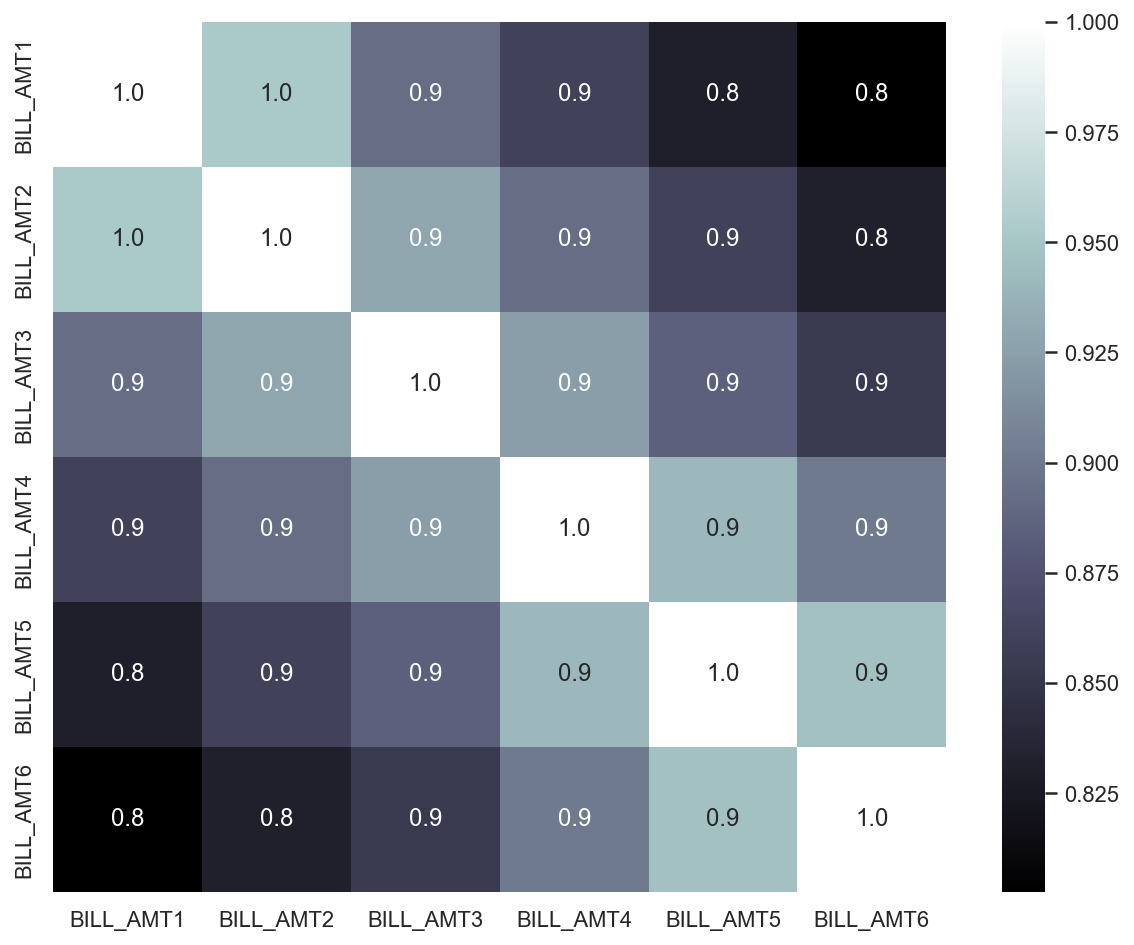

In [86]:
# 컬럼 BILL_AMT1~6 까지
# 피처선택 : 불필요한 피처 제거 - 상관계수
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)] # 리스트 내포

# 피처 상관관계
# corr = X_features.corr()
corr = X_features[cols_bill].corr()

sns.heatmap(corr, annot=True, fmt='.1f', cmap='bone')
plt.bone()
plt.show()

In [69]:
# 피처 스케일링
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# 차원축소 = 2
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

# 변동비율
print(f'PCA Component별 변동성: {pca.explained_variance_ratio_}')

PCA Component별 변동성: [0.90555253 0.0509867 ]


### 변환 전 성능

In [70]:
# 성능예측
rcf= RandomForestClassifier(n_estimators=300, random_state=1017)

scores=cross_val_score(rcf, X_features, y_target, scoring='accuracy',
                       cv =3)
print(f'원본 데이터 fold별 정확도: {scores}')
print(f'원본 데이터 평균 정확도: {np.mean(scores):.4f}')

원본 데이터 fold별 정확도: [0.8082 0.8217 0.8223]
원본 데이터 평균 정확도: 0.8174


### 변환 후 성능

In [73]:
# 피처 스케일링
scaler=StandardScaler()
df_scaled = scaler.fit_transform(X_features)
# PCA: n=6
pca = PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
# 분류모델
rcf = RandomForestClassifier(n_estimators=300, random_state=1017)

# 교차검증
pca_scores = cross_val_score(rcf, df_pca,y_target,
                             scoring = 'accuracy',cv = 3) # 3개로 교차검증
# 정확도
print(f'원본 데이터 fold별 정확도: {pca_scores}')
print(f'원본 데이터 평균 정확도: {np.mean(pca_scores):.4f}')

원본 데이터 fold별 정확도: [0.7912 0.797  0.8035]
원본 데이터 평균 정확도: 0.7972
